In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.getcwd()
data=pd.read_csv('LinearRegression.csv')

data1=data[["price","sqft_living"]]
data2=data[["price","bedrooms"]]
data3=data[["price","bathrooms"]]
data4=data[["price","floors"]]

## for price and bathrooms

In [4]:
data3.head()

,price,bathrooms
0,221900,1.00
1,538000,2.25
2,180000,1.00
3,604000,3.00
4,510000,2.00


In [5]:
data3.tail()

,price,bathrooms
21608,360000,2.50
21609,400000,2.50
21610,402101,0.75
21611,400000,2.50
21612,325000,0.75


In [6]:
data3.dtypes

price          int64
bathrooms    float64
dtype: object

In [7]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21613 non-null  int64  
 1   bathrooms  21613 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 337.8 KB


In [8]:
data3.describe()

,price,bathrooms
count,2.161300e+04,21613.000000
mean,5.400881e+05,2.114757
std,3.671272e+05,0.770163
min,7.500000e+04,0.000000
25%,3.219500e+05,1.750000
50%,4.500000e+05,2.250000
75%,6.450000e+05,2.500000
max,7.700000e+06,8.000000


# EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000299CAA25908>,
      dtype=object)

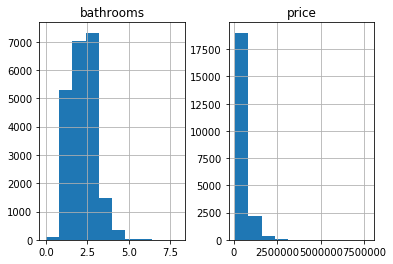

In [9]:
data3.hist()

In [10]:
data3.corr()

,price,bathrooms
price,1.000000,0.525138
bathrooms,0.525138,1.000000


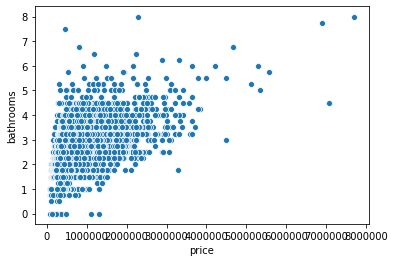

In [12]:
sns.scatterplot(data3['price'],data3['bathrooms'])

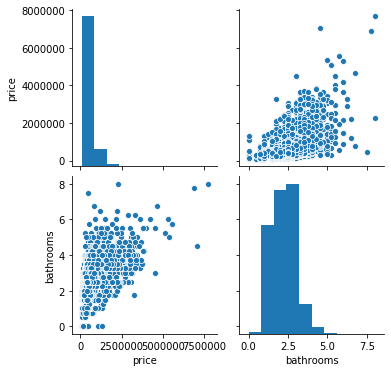

In [13]:
sns.pairplot(data3)

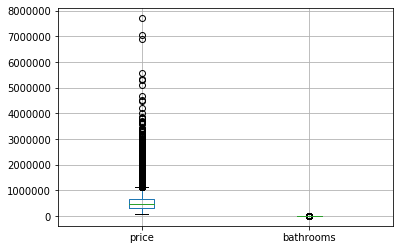

In [14]:
data3.boxplot()

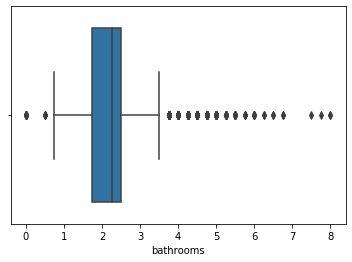

In [15]:
sns.boxplot(data3['bathrooms'])

# Assign the features to X & Y

In [16]:
data3.head(1)

,price,bathrooms
0,221900,1.0


In [17]:
x=data3.iloc[:,:1]

In [19]:
x.head(1)

,price
0,221900


In [21]:
y=data3.iloc[:,1:]

In [22]:
y.head(1)

,bathrooms
0,1.0


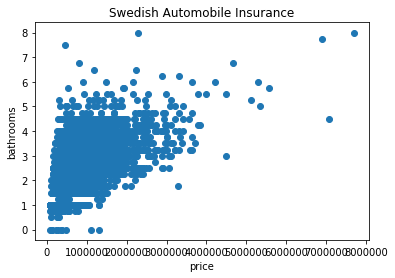

In [23]:
# Visualise dataset
plt.scatter(x, y)
plt.title('Swedish Automobile Insurance')
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.show()

# Split the records for training & testing

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

In [42]:
data3.shape

(21613, 2)

In [26]:
X_train.shape

(17290, 1)

In [27]:
X_test.shape

(4323, 1)

In [28]:
y_train.shape

(17290, 1)

In [29]:
y_test.shape

(4323, 1)

# Model Building with sklearn

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


# Train the model

In [31]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lin_reg.coef_

array([[1.10105199e-06]])

In [33]:
lin_reg.intercept_

array([1.5185242])

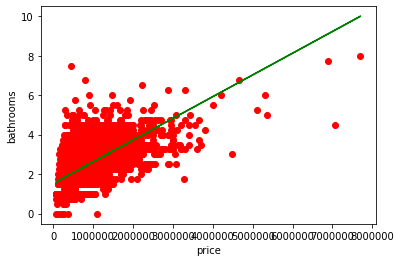

In [34]:
 #Visualise Training set result
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lin_reg.predict(X_train), color = 'green')
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.show()


# Test the model

In [35]:
ypred=lin_reg.predict(X_test)
ypred

array([[2.32779742],
       [2.78473399],
       [1.90444293],
       ...,
       [1.95613732],
       [1.9314187 ],
       [1.74754302]])

In [36]:
X_test.head()

,price
6638,735000
7366,1150000
3158,350500
9117,860000
3392,122000


In [37]:
data3.head()

,price,bathrooms
0,221900,1.00
1,538000,2.25
2,180000,1.00
3,604000,3.00
4,510000,2.00


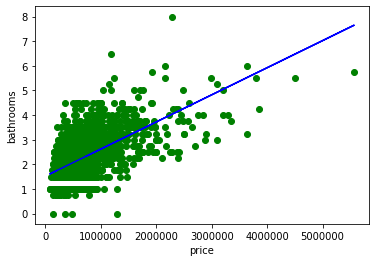

In [38]:
# Visualise Test set result
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_test,lin_reg.predict(X_test), color = 'blue')
plt.xlabel('price')
plt.ylabel('bathrooms')
plt.show()


# estimate the cost

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
RMSE=np.sqrt(mean_squared_error(y_test,ypred))
r_square=r2_score(y_test,ypred)

print('The R-Square value is...',r_square)
print('The RMSE value is........',RMSE)

The R-Square value is... 0.28127401846250877
The RMSE value is........ 0.6591011174526225


In [40]:
data3.head()

,price,bathrooms
0,221900,1.00
1,538000,2.25
2,180000,1.00
3,604000,3.00
4,510000,2.00


# How to predict for unseen value

In [43]:
unseen_pred=lin_reg.predict(np.array([[3234]]))
print('The unseen for the given price is....',unseen_pred)

The unseen for the given price is.... [[1.52208501]]
